<h1>Data loading </h1>
We are provided with 5 csv files

gdp.csv : 🇹🇭's GDP in quaterly resolution

poplulation.csv : population size in yearly resolution

vehicle_sales.csv : number of vehicles (passenger, commercial, and motorbike) sold

train.csv : CO2 emission across differt sources between 1897-01 ~ 2021-12

test.csv : same as train.csv but between 2022-01 ~ 2022-12 and no emission_tons column

let's load the files and visualize one by one to observe some potential trend that are crucial for model buidling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

import warnings
warnings.filterwarnings('ignore')

In [9]:
# load data
gdp = pd.read_csv('../datasets/gdp.csv')
population = pd.read_csv('../datasets/population.csv')
vehicle = pd.read_csv('../datasets/vehicle_sales.csv')
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [14]:
# check head
print(gdp.head())
print(population.head())
print(vehicle.head())
print(train.head())
print(test.head())

   Year Quarter  GDP_(current_mkt_value)  GDP_(ref_year=2002)       time
0  1993      Q1                 788014.0            1067301.0 1993-01-01
1  1993      Q2                 782212.0            1039924.0 1993-04-01
2  1993      Q3                 832158.0            1086494.0 1993-07-01
3  1993      Q4                 861042.0            1147308.0 1993-10-01
4  1994      Q1                 914639.0            1179517.0 1994-01-01
   Year  Population
0  1993    58336072
1  1994    59095419
2  1995    59460382
3  1996    60116182
4  1997    60816227
   year  passenger  commercial  motorcycle    total       time
0  1986      21950       56531      249752   328233 1986-01-01
1  1987      26909       74451      310579   411939 1987-01-01
2  1988      39232      107763      494586   641581 1988-01-01
3  1989      47705      160436      588278   796419 1989-01-01
4  1990      65813      238297      732848  1036958 1990-01-01
            year  month     source fuel_type  emissions_tons sou

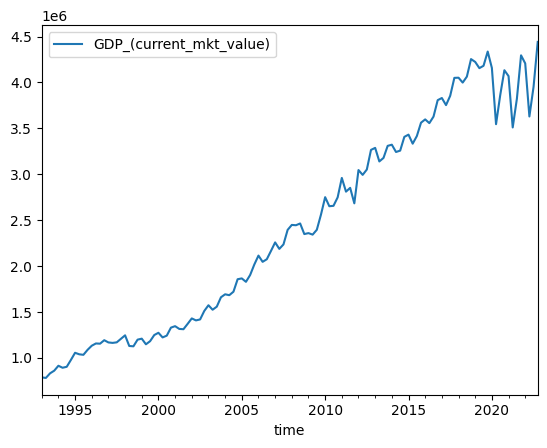

In [10]:
# obtain datetime column fromyear quater column
gdp["time"] = gdp.apply(lambda row : pd.to_datetime(str(row["Year"]) + row["Quarter"]), axis = 1)
gdp.plot.line(x= "time", y="GDP_(current_mkt_value)")
plt.show()


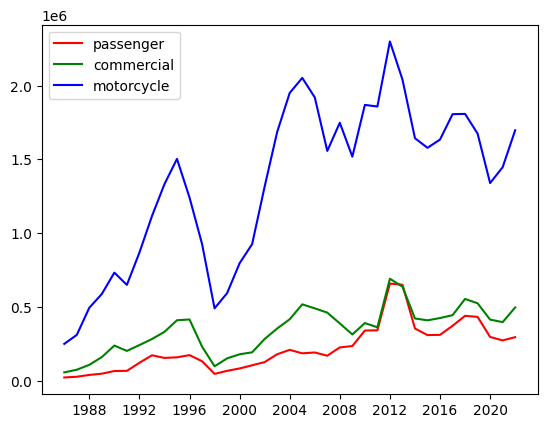

In [12]:
# obtain datetime column from year column
vehicle["time"] = vehicle.apply(lambda row : pd.to_datetime(str(row["year"])), axis = 1)

plt.plot(vehicle["time"], vehicle["passenger"], color='red',label="passenger")
plt.plot(vehicle["time"], vehicle["commercial"], color='green',label="commercial")
plt.plot(vehicle["time"], vehicle["motorcycle"], color='blue',label="motorcycle")
plt.legend()
plt.show()

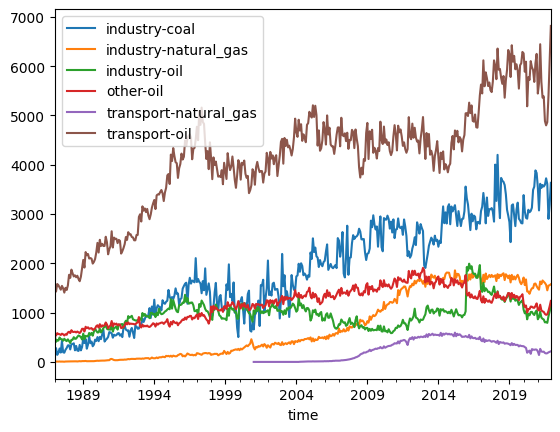

In [13]:
# obtain datetime from year column
train["time"] = train.apply(lambda row : pd.to_datetime(str(row["year"]) + " " + str(row["month"])), axis = 1)
train["source_fueltype"] = train[["source", "fuel_type"]].apply("-".join, axis=1)
train.set_index('time', inplace=True)
train.groupby('source_fueltype')["emissions_tons"].plot(legend=True)
plt.show()